<a href="https://colab.research.google.com/github/guimaraess2/Linear-Regresion-Machine-Learning/blob/master/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

**Carregando o dataset**

In [3]:
df=pd.read_csv('/content/sample_data/pima-data.csv' )

**Dando uma olhadinha nos dados**

In [4]:
df.sample(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
742,1,109,58,18,116,28.5,0.219,22,0.7092,False
485,0,135,68,42,250,42.3,0.365,24,1.6548,True
357,13,129,0,30,0,39.9,0.569,44,1.1820,True
153,1,153,82,42,485,40.6,0.687,23,1.6548,False
301,2,144,58,33,135,31.6,0.422,25,1.3002,True


**Verificando o número de linhas e colunas**

In [5]:
df.shape

(768, 10)

**Separando as varáveis dependentes e independentes**

In [16]:
X = df.iloc[:, 0:9].values
y = df.iloc[:, -1].values

**Verificando a correlação entre as variáveis**

In [17]:
corr = df.corr() 
corr

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


**Criando uma matriz de correlação**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


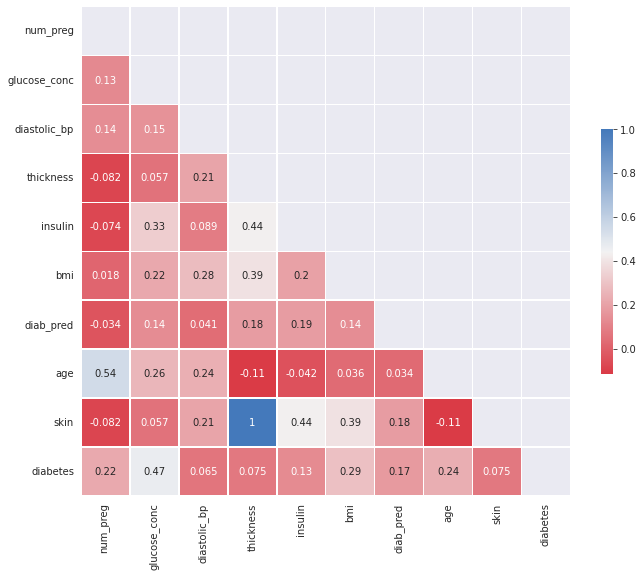

In [28]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns. set_style(style = 'darkgrid') 
f, ax = plt.subplots(figsize=(11, 9)) 
cmap = sns.diverging_palette(10, 250, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap= cmap, annot=True,square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**Utilizando o método SelectKBest para classificação das melhores 6 features**

In [9]:
teste_f_classif = SelectKBest(score_func=f_classif, k=6)

**Treinando o  modelo utilizando o a função f_classif**

In [17]:
treino = f_classif.fit(X,y)
caracteristicas = fit.transform(X)

**Verificando quais 6 características tiveram a maior pontuação**

In [19]:
cols = fit.get_support(indices=True)
df.iloc[:, cols].head()

,num_preg,glucose_conc,insulin,bmi,diab_pred,age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
